In [13]:
pip install fastai


  Using cached fastai-2.8.1-py3-none-any.whl.metadata (9.5 kB)
  Using cached fastdownload-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached fastcore-1.8.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached fasttransform-0.0.2-py3-none-any.whl.metadata (7.6 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached plum_dispatch-2.5.7-py3-none-any.whl.metadata (7.5 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Using cached beartype-0.20.2-py3-none-any.wh

In [14]:
from fastai import *
from fastai.vision.all import *
import numpy as np

In [15]:
batch_size = 32
img_path = 'pet_images/cat_breeds'
fnames = get_image_files(img_path)
pat = r'^(.*)_\d+.jpg'

In [16]:
np.random.seed(42)

In [17]:
item_tfms = Resize(460)
batch_tfms = aug_transforms(size=224, max_rotate=10, flip_vert=True, max_zoom=1.1)

In [18]:
dls = ImageDataLoaders.from_name_re(
    img_path, fnames, pat,
    item_tfms=item_tfms,
    batch_tfms=batch_tfms,
    bs=batch_size
)

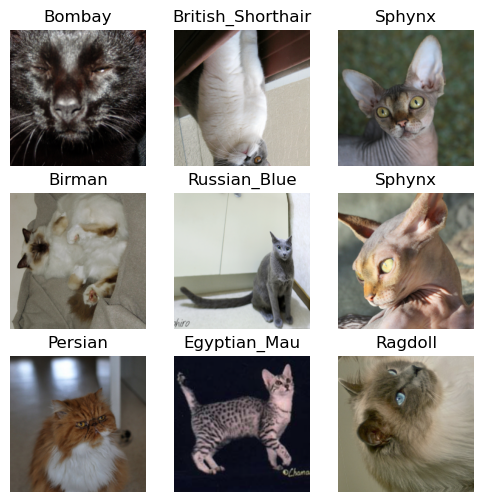

In [19]:
dls.show_batch(max_n=9, figsize=(6,6))

In [20]:
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()

C:\Users\micha\anaconda3\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
C:\Users\micha\anaconda3\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\micha\anaconda3\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
C:\Users\micha\anaconda3\Lib\site-packages\torch\amp\grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


SuggestedLRs(valley=0.0006918309954926372)

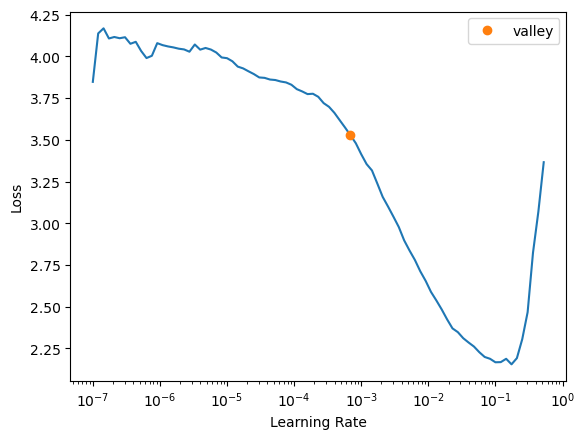

In [21]:
learn.lr_find()

In [39]:
learn.fine_tune(7, base_lr=1e-3)

C:\Users\micha\anaconda3\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
C:\Users\micha\anaconda3\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\micha\anaconda3\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
C:\Users\micha\anaconda3\Lib\site-packages\torch\amp\grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.378997,0.331319,0.111111,01:57


epoch,train_loss,valid_loss,error_rate,time
0,0.333323,0.298567,0.097222,02:05
1,0.304559,0.277815,0.083333,02:15
2,0.282093,0.285245,0.090278,02:15
3,0.247547,0.263961,0.083333,02:15
4,0.237705,0.258369,0.069444,02:16
5,0.218472,0.249425,0.069444,02:16
6,0.189339,0.260800,0.069444,02:13


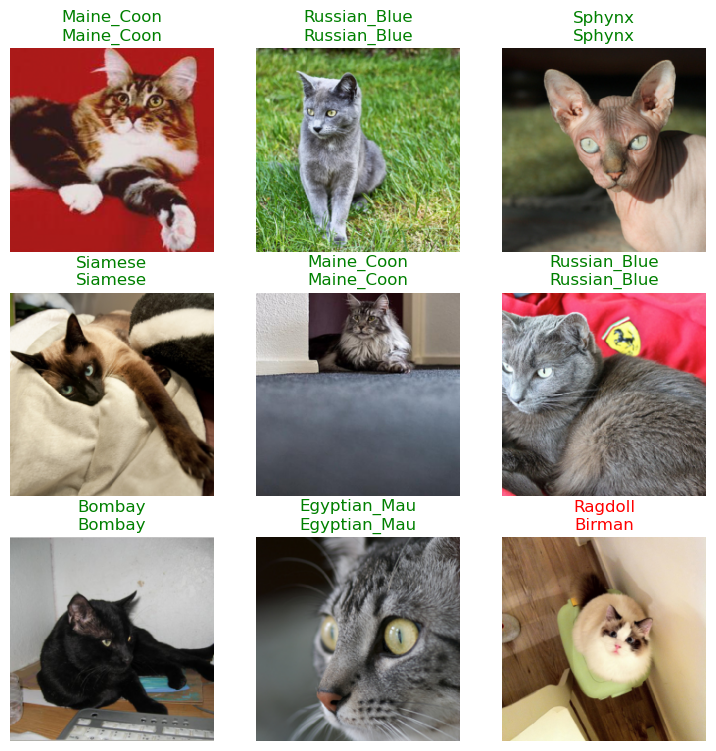

In [41]:
learn.show_results()

In [43]:
interp = Interpretation.from_learner(learn)

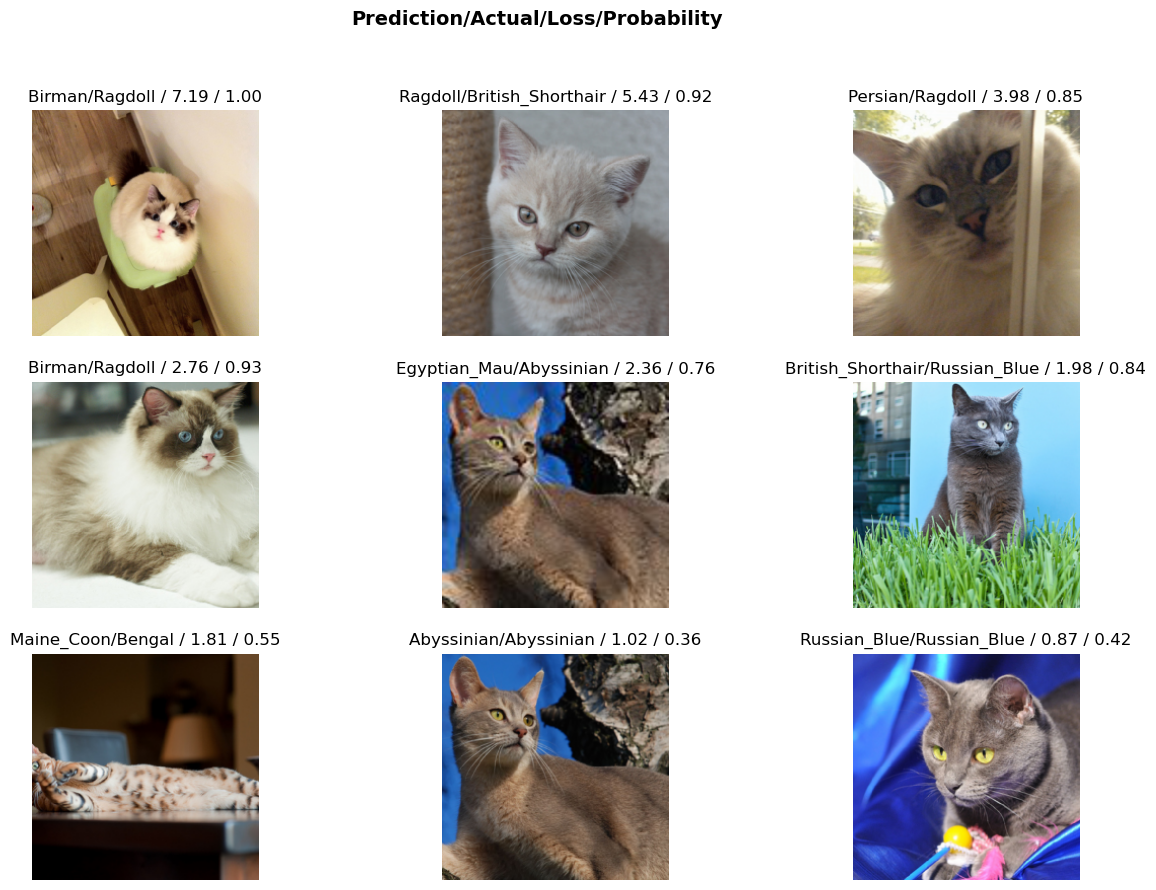

In [45]:
interp.plot_top_losses(9, figsize=(15,10))

In [55]:
learn.predict("siamese_test2.jpg")

('Siamese',
 tensor(10),
 tensor([4.4156e-03, 1.4089e-03, 1.9024e-02, 9.7606e-05, 2.5507e-02, 2.0838e-05,
         1.8837e-05, 2.4946e-05, 1.1493e-03, 3.7734e-02, 9.1012e-01, 4.7617e-04]))